# Getting Started

In [10]:
import numpy as np
import sqlite3

import pandas as pd

pd.set_option('display.max_columns', None)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

In [12]:
connection = sqlite3.connect(r'C:\Users\Admin\Downloads\database.sqlite')


# Create DataFrame

In [13]:

players_df = pd.read_sql_query("SELECT * FROM Player", connection)
stats_df = pd.read_sql_query("SELECT * FROM Player_Attributes", connection)
team_df =  pd.read_sql_query("SELECT * FROM Team_Attributes", connection)


In [49]:
cursor = connection.cursor()
#new_column_name = 'target'
#cursor.execute(f'ALTER TABLE Match ADD COLUMN {new_column_name} INTEGER')
# Step 3: Update the values in the new column based on conditions
update_query = '''
    UPDATE Match
    SET target = 
        CASE
            WHEN home_team_goal > away_team_goal THEN 1
            WHEN home_team_goal = away_team_goal THEN 0
            else 2
        END;
'''

cursor.execute(update_query)
connection.commit()


In [96]:
matches_df = pd.read_sql_query("SELECT * FROM Match", connection)

In [ ]:
team_df

In [ ]:
matches_df

# Learn Some Database Attributes

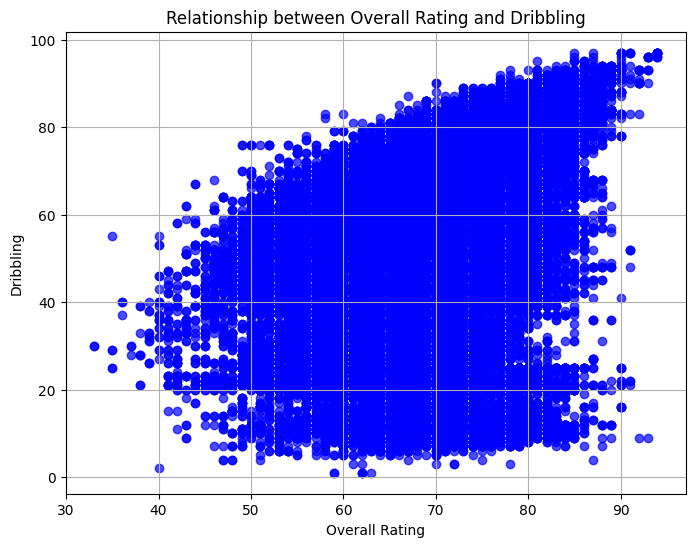

In [174]:
import matplotlib.pyplot as plt
import pandas as pd
df = stats_df
plt.figure(figsize=(8, 6))
plt.scatter(df['overall_rating'], df['dribbling'], color='blue', alpha=0.7)
plt.title('Relationship between Overall Rating and Dribbling')
plt.xlabel('Overall Rating')
plt.ylabel('Dribbling')
plt.grid(True)
plt.show()

In [17]:
# Execute a query to fetch the schema information

cursor.execute("SELECT name, sql FROM sqlite_master WHERE type='table';")

# Fetch all the tables and their corresponding CREATE TABLE statements
tables = cursor.fetchall()

# Print the schema information
for table in tables:
    table_name, create_statement = table
    print(f"Table: {table_name}")
    print("Schema:")
    print(create_statement)
    print("\n")

# Close the connection

Table: sqlite_sequence
Schema:
CREATE TABLE sqlite_sequence(name,seq)


Table: Player_Attributes
Schema:
CREATE TABLE "Player_Attributes" (
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,
	`player_fifa_api_id`	INTEGER,
	`player_api_id`	INTEGER,
	`date`	TEXT,
	`overall_rating`	INTEGER,
	`potential`	INTEGER,
	`preferred_foot`	TEXT,
	`attacking_work_rate`	TEXT,
	`defensive_work_rate`	TEXT,
	`crossing`	INTEGER,
	`finishing`	INTEGER,
	`heading_accuracy`	INTEGER,
	`short_passing`	INTEGER,
	`volleys`	INTEGER,
	`dribbling`	INTEGER,
	`curve`	INTEGER,
	`free_kick_accuracy`	INTEGER,
	`long_passing`	INTEGER,
	`ball_control`	INTEGER,
	`acceleration`	INTEGER,
	`sprint_speed`	INTEGER,
	`agility`	INTEGER,
	`reactions`	INTEGER,
	`balance`	INTEGER,
	`shot_power`	INTEGER,
	`jumping`	INTEGER,
	`stamina`	INTEGER,
	`strength`	INTEGER,
	`long_shots`	INTEGER,
	`aggression`	INTEGER,
	`interceptions`	INTEGER,
	`positioning`	INTEGER,
	`vision`	INTEGER,
	`penalties`	INTEGER,
	`marking`	INTEGER,
	`standing_tackle`	INTEGE

In [ ]:
matches_df

In [ ]:
features = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA','awayscore1', 'homescore1', 
                    'awayscore2', 'homescore2', 'awayscore3', 'homescore3', 'awayscore4', 'homescore4', 'awayscore5', 'homescore5', 'awayscore6',
                      'homescore6', 'awayscore7', 'homescore7', 'Home_Player_Overall_0', 'Home_Player_Overall_1', 'Home_Player_Overall_2', 
                      'Home_Player_Overall_3', 'Home_Player_Overall_4', 'Home_Player_Overall_5', 'Home_Player_Overall_6', 'Home_Player_Overall_7', 
                      'Home_Player_Overall_8', 'Home_Player_Overall_9', 'Home_Player_Overall_10', 'Away_Player_Overall_11', 'Away_Player_Overall_12', 
                      'Away_Player_Overall_13', 'Away_Player_Overall_14', 'Away_Player_Overall_15', 'Away_Player_Overall_16', 'Away_Player_Overall_17', 'Away_Player_Overall_18', 'Away_Player_Overall_19', 'Away_Player_Overall_20', 'Away_Player_Overall_21']

# Calculate the covariance of each feature with 'target'
covariances = {feature: matches_df[feature].cov(matches_df['target']) for feature in features}
sorted_covariances = sorted(covariances.items(), key=lambda x: x[1], reverse=True)
l = []
# Print the result
for feature, covariance in sorted_covariances:
    l.append(feature)
    print(f"Covariance between {feature} and 'target': {covariance}")
print(l)

In [21]:
column_names = matches_df.columns.tolist()
print(column_names)

['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_

# Preporcessing

### 1. Collecting data from multiple tables:

In [59]:
subquery = '''
    SELECT team_api_id, MAX(date) as latest_date, buildUpPlaySpeed,buildUpPlayPassing, chanceCreationPassing,chanceCreationShooting, defencePressure, defenceAggression, defenceTeamWidth
    FROM Team_Attributes
    GROUP BY team_api_id
'''
test = pd.read_sql_query(subquery, connection)

In [60]:
overall_rate = '''
    SELECT player_api_id, overall_rating
    FROM Player_Attributes
    GROUP BY player_api_id
'''
player = pd.read_sql_query(overall_rate, connection)

In [24]:
player

,player_api_id,overall_rating
0,2625,61
1,2752,72
2,2768,74
3,2770,69
4,2790,67
...,...,...
11055,744907,53
11056,746419,59
11057,748432,58
11058,750435,60


### 2. Map to the matches_df DataFrame:

In [ ]:
# Extract relevant date components

matches_df['date'] = pd.to_datetime(matches_df['date'],dayfirst=True)

matches_df['Year'] = matches_df['date'].dt.year
matches_df['Month'] = matches_df['date'].dt.month

matches_df['Day'] = matches_df['date'].dt.day

In [98]:
# Create a dictionary mapping team_api_id to BuildUpPlay from test_df
team_api_id_to_buildupplay1 = test.set_index('team_api_id')['buildUpPlaySpeed'].to_dict()
team_api_id_to_buildupplay2 = test.set_index('team_api_id')['buildUpPlayPassing'].to_dict()
team_api_id_to_buildupplay3 = test.set_index('team_api_id')['chanceCreationPassing'].to_dict()
team_api_id_to_buildupplay4 = test.set_index('team_api_id')['chanceCreationShooting'].to_dict()
team_api_id_to_buildupplay5 = test.set_index('team_api_id')['defencePressure'].to_dict()
team_api_id_to_buildupplay6 = test.set_index('team_api_id')['defenceAggression'].to_dict()
team_api_id_to_buildupplay7 = test.set_index('team_api_id')['defenceTeamWidth'].to_dict()
# Add a new column "awayscore" to matches_df based on the mapping
matches_df['awayscore1'] = matches_df['away_team_api_id'].map(team_api_id_to_buildupplay1)
matches_df['homescore1'] = matches_df['home_team_api_id'].map(team_api_id_to_buildupplay1)
matches_df['awayscore2'] = matches_df['away_team_api_id'].map(team_api_id_to_buildupplay2)
matches_df['homescore2'] = matches_df['home_team_api_id'].map(team_api_id_to_buildupplay2)
matches_df['awayscore3'] = matches_df['away_team_api_id'].map(team_api_id_to_buildupplay3)
matches_df['homescore3'] = matches_df['home_team_api_id'].map(team_api_id_to_buildupplay3)
matches_df['awayscore4'] = matches_df['away_team_api_id'].map(team_api_id_to_buildupplay4)
matches_df['homescore4'] = matches_df['home_team_api_id'].map(team_api_id_to_buildupplay4)
matches_df['awayscore5'] = matches_df['away_team_api_id'].map(team_api_id_to_buildupplay5)
matches_df['homescore5'] = matches_df['home_team_api_id'].map(team_api_id_to_buildupplay5)
matches_df['awayscore6'] = matches_df['away_team_api_id'].map(team_api_id_to_buildupplay6)
matches_df['homescore6'] = matches_df['home_team_api_id'].map(team_api_id_to_buildupplay6)
matches_df['awayscore7'] = matches_df['away_team_api_id'].map(team_api_id_to_buildupplay7)
matches_df['homescore7'] = matches_df['home_team_api_id'].map(team_api_id_to_buildupplay7)

#matches_df['awayscore'].fillna(0, inplace=True)
#matches_df['homescore'].fillna(0, inplace=True)

In [99]:
mapping_player = player.set_index('player_api_id')['overall_rating'].to_dict()
player_index_list = ['home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9', 
                     'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7', 
                     'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11']
for i in range(11):
    new_column = 'Home_Player_Overall_{}'.format(i)
    matches_df[new_column] = matches_df[player_index_list[i]].map(mapping_player)
for i in range(10,22):
    new_column = 'Away_Player_Overall_{}'.format(i)
    matches_df[new_column] = matches_df[player_index_list[i]].map(mapping_player)


In [100]:
matches_df['sum_home'] =matches_df[['Home_Player_Overall_0', 'Home_Player_Overall_1', 'Home_Player_Overall_2', 'Home_Player_Overall_3',
                      'Home_Player_Overall_4', 'Home_Player_Overall_5', 'Home_Player_Overall_6', 'Home_Player_Overall_7',
                        'Home_Player_Overall_8', 'Home_Player_Overall_9', 'Home_Player_Overall_10',]].sum(axis=1)

matches_df['sum_away'] =matches_df[[ 'Away_Player_Overall_11','Away_Player_Overall_12', 'Away_Player_Overall_13', 'Away_Player_Overall_14', 'Away_Player_Overall_15', 'Away_Player_Overall_16',
                      'Away_Player_Overall_17', 'Away_Player_Overall_18', 'Away_Player_Overall_19', 'Away_Player_Overall_20', 'Away_Player_Overall_21']].sum(axis=1)

In [160]:
matches_df

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,target,awayscore1,homescore1,awayscore2,homescore2,awayscore3,homescore3,awayscore4,homescore4,awayscore5,homescore5,awayscore6,homescore6,awayscore7,homescore7,Home_Player_Overall_0,Home_Player_Overall_1,Home_Player_Overall_2,Home_Player_Overall_3,Home_Player_Overall_4,Home_Player_Overall_5,Home_Player_Overall_6,Home_Player_Overall_7,Home_Player_Overall_8,Home_Player_Overall_9,Home_Player_Overall_10,Away_Player_Overall_10,Away_Player_Overall_11,Away_Player_Overall_12,Away_Player_Overall_13,Away_Player_Overall_14,Away_Player_Overall_15,Away_Player_Overall_16,Away_Player_Overall_17,Away_Player_Overall_18,Away_Player_Overall_19,Away_Player_Overall_20,Away_Player_Overall_21,sum_home,sum_away,Year,Month,Day
145,146,1,1,2008/2009,24,2009-02-27,493017,8203,9987,2,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,38327.0,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,67898.0,164352.0,38801.0,26502.0,37937.0,38293.0,148313.0,104411.0,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0,None,None,None,None,None,None,None,None,3.00,3.40,2.30,2.95,3.25,2.20,2.80,3.1,2.20,2.75,3.25,2.20,NaN,NaN,NaN,2.62,3.2,2.30,3.05,3.20,2.30,2.65,3.25,2.35,2.90,3.25,2.30,2.80,3.2,2.25,1,58.0,52.0,38.0,40.0,30.0,47.0,56.0,50.0,36.0,42.0,57.0,51.0,70.0,52.0,68.0,65.0,73.0,67.0,72.0,63.0,65.0,69.0,60.0,65.0,64.0,64.0,70.0,70.0,62.0,68.0,72.0,70.0,67.0,66.0,71.0,65.0,75.0,731.0,756.0,2009,2,27
153,154,1,1,2008/2009,25,2009-03-08,493025,9984,8342,1,3,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,36835.0,37047.0,37021.0,37051.0,104386.0,32863.0,37957.0,37909.0,38357.0,37065.0,78462.0,37990.0,21812.0,11736.0,37858.0,38366.0,37983.0,39578.0,38336.0,52280.0,27423.0,38440.0,None,None,None,None,None,None,None,None,2.80,3.20,2.37,3.10,3.00,2.20,2.80,3.1,2.20,3.20,3.20,2.00,NaN,NaN,NaN,3.20,3.2,2.00,3.05,3.25,2.25,2.65,3.20,2.35,2.90,3.20,2.30,2.62,3.2,2.38,2,42.0,53.0,45.0,43.0,42.0,52.0,47.0,42.0,51.0,59.0,50.0,47.0,57.0,62.0,66.0,64.0,63.0,62.0,64.0,71.0,65.0,64.0,69.0,68.0,63.0,63.0,69.0,69.0,73.0,72.0,73.0,67.0,67.0,75.0,71.0,65.0,70.0,719.0,771.0,2009,3,8
155,156,1,1,2008/2009,25,2009-03-07,493027,8635,10000,2,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,34480.0,38388.0,26458.0,13423.0,38389.0,30949.0,38393.0,38253.0,38383.0,38778.0,37069.0,37900.0,37886.0,37903.0,37889.0,94030.0,37893.0,37981.0,131

### 3. Drop NAN Samples:

In [102]:
# Specify the columns to check for null values
columns_to_check = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
                      'homescore6', 'awayscore7', 'homescore7', 'Home_Player_Overall_0', 'Home_Player_Overall_1', 'Home_Player_Overall_2', 
                      'Home_Player_Overall_3', 'Home_Player_Overall_4', 'Home_Player_Overall_5', 'Home_Player_Overall_6', 'Home_Player_Overall_7', 
                      'Home_Player_Overall_8', 'Home_Player_Overall_9', 'Home_Player_Overall_10', 'Away_Player_Overall_11', 'Away_Player_Overall_12', 
                      'Away_Player_Overall_13', 'Away_Player_Overall_14', 'Away_Player_Overall_15', 'Away_Player_Overall_16', 'Away_Player_Overall_17', 'Away_Player_Overall_18', 'Away_Player_Overall_19', 'Away_Player_Overall_20', 'Away_Player_Overall_21',
                       'VCH', 'VCD', 'VCA'
                    ]

# Drop rows where any of the specified columns have null values
matches_df = matches_df.dropna(subset=columns_to_check, how='any')

# If you want to drop rows only when all specified columns have null values, use 'all' instead of 'any':
# matches_df = matches_df.dropna(subset=columns_to_check, how='all')


In [116]:
matches_df.shape

(19498, 157)

# Training Models


In [260]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import SGDClassifier
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
import xgboost as xgb

In [193]:
# Extract features and target from DataFrame
features = matches_df[['B365H', 'B365A', 'BWH', 'BWA', 'IWH', 'IWA', 'LBH', 'LBA',
                       'awayscore2', 'homescore2', 'awayscore3', 'homescore3', 'awayscore4', 'homescore4', 'awayscore5', 'homescore5', 'awayscore6', 'homescore6', 'awayscore7', 'homescore7' ,'sum_away','sum_home', 'VCH', 'VCD', 'VCA', 'Year','Month','Day'
                       ]]  # Add the actual column names
target = matches_df['target']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### 1. Train by Support Vector Machine: 

In [194]:


# Create the SVC model
model = SVC(kernel= 'poly')

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.5f}')


Accuracy: 0.53154


In [195]:
y_pred = model.predict(X_test).tolist()
y_test_list = y_test.tolist()

In [196]:
sum = 0
for actual, predicted, index in zip(y_test, y_pred, X_test.index):


    # Check if the prediction is correct
    if actual == predicted:
        if actual == 1:
            sum += max(matches_df.loc[index, 'B365H'],matches_df.loc[index, 'BWH'],matches_df.loc[index,'IWH'],matches_df.loc[index, 'LBH'],matches_df.loc[index, 'VCH'])
        elif actual == 0:
            sum += max(matches_df.loc[index, 'B365D'],matches_df.loc[index, 'BWD'],matches_df.loc[index,'IWD'],matches_df.loc[index, 'LBD'],matches_df.loc[index, 'VCD'])
        elif actual == 2:
            sum += max(matches_df.loc[index, 'B365A'],matches_df.loc[index, 'BWA'],matches_df.loc[index,'IWA'],matches_df.loc[index, 'LBA'],matches_df.loc[index, 'VCA'])
    else:
        sum += 0
print(sum/len(y_pred))

1.0208910256410253


### 2. Train by LSTM: 

In [169]:
# Extract features and target from DataFrame
features = matches_df[['B365H', 'B365A', 'BWH', 'BWA', 'IWH', 'IWA', 'LBH', 'LBA',
                       'awayscore2', 'homescore2', 'awayscore3', 'homescore3', 'awayscore4', 'homescore4', 'awayscore5', 'homescore5', 'awayscore6', 'homescore6', 'awayscore7', 'homescore7' ,'sum_away','sum_home', 'VCH', 'VCD', 'VCA', 'Year','Month','Day'
                       ]]  # Add the actual column names
target = matches_df['target']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 2: Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Reshape the data to be suitable for an LSTM
# Assuming each sample is a sequence of length `sequence_length`
sequence_length = 10  # You can adjust this based on your data
X_train_seq = np.array([X_train[i:i+sequence_length] for i in range(len(X_train) - sequence_length)])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

X_test_seq = np.array([X_test[i:i+sequence_length] for i in range(len(X_test) - sequence_length)])

# Assuming y_train and y_test are already encoded (e.g., using one-hot encoding)
# If not, you can use LabelEncoder or to_categorical to encode them

# Step 4: Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, X_train.shape[1]), dropout=0.2, recurrent_dropout=0.2,kernel_regularizer=l2(0.01)))
model.add(Dense(3, activation='softmax'))  # Assuming three classes
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
model.fit(X_train_seq, y_train[sequence_length:], epochs=20, batch_size=8, validation_split=0.2)

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(X_test_seq, y_test[sequence_length:])
print(f'Test accuracy: {test_acc}')



Epoch 1/20
1559/1559 [==============================] - 10s 5ms/step - loss: 1.1338 - accuracy: 0.4534 - val_loss: 1.0752 - val_accuracy: 0.4564
Epoch 2/20
1559/1559 [==============================] - 7s 4ms/step - loss: 1.0693 - accuracy: 0.4601 - val_loss: 1.0679 - val_accuracy: 0.4564
Epoch 3/20
1559/1559 [==============================] - 7s 4ms/step - loss: 1.0662 - accuracy: 0.4606 - val_loss: 1.0688 - val_accuracy: 0.4564
Epoch 4/20
1559/1559 [==============================] - 7s 4ms/step - loss: 1.0657 - accuracy: 0.4605 - val_loss: 1.0679 - val_accuracy: 0.4564
Epoch 5/20
1559/1559 [==============================] - 7s 4ms/step - loss: 1.0651 - accuracy: 0.4605 - val_loss: 1.0682 - val_accuracy: 0.4564
Epoch 6/20
1559/1559 [==============================] - 7s 4ms/step - loss: 1.0648 - accuracy: 0.4605 - val_loss: 1.0660 - val_accuracy: 0.4564
Epoch 7/20
1559/1559 [==============================] - 7s 5ms/step - loss: 1.0649 - accuracy: 0.4605 - val_loss: 1.0657 - val_accuracy

#### Discussion:
Firstly, we did not add regularizer and set the batch_size to 32, the model showed the tendency to be overfit when train_accuray reach 0.56 while test accuracy was only 0.38. We modified batch_size, add L2 regularizer and early_stopping to stablize the model's performance

### 3. Train by XGBoost:

In [262]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 3,  # Number of classes
    'eval_metric': 'mlogloss',  # Logarithmic loss
    'eta': 0.1,  # Learning rate
    'max_depth':3,  # Maximum depth of a tree
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    'seed': 30
}

# Train the XGBoost model
num_round = 70
model = xgb.train(params, dtrain, num_round)

# Predictions on the test set
y_pred = model.predict(dtest)

# Convert predicted probabilities to class labels
y_pred_class = [int(round(pred)) for pred in y_pred]


# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred_class)

print(f'Test accuracy: {test_accuracy:.5f}')

Test accuracy: 0.53974


In [263]:
sum = 0

y_test_list = y_test.tolist()
for actual, predicted, index in zip(y_test, y_pred_class, X_test.index):


    # Check if the prediction is correct
    if actual == predicted:
        if actual == 1:
            sum += max(matches_df.loc[index, 'B365H'],matches_df.loc[index, 'BWH'],matches_df.loc[index,'IWH'],matches_df.loc[index, 'LBH'],matches_df.loc[index, 'VCH'])
        elif actual == 0:
            sum += max(matches_df.loc[index, 'B365D'],matches_df.loc[index, 'BWD'],matches_df.loc[index,'IWD'],matches_df.loc[index, 'LBD'],matches_df.loc[index, 'VCD'])
        elif actual == 2:
            sum += max(matches_df.loc[index, 'B365A'],matches_df.loc[index, 'BWA'],matches_df.loc[index,'IWA'],matches_df.loc[index, 'LBA'],matches_df.loc[index, 'VCA'])
    else:
        sum += 0
print(sum/len(y_pred_class))

1.0152833333333329


In [ ]:
stats_df